In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [239]:
tcs_stock_data = pd.read_csv('../../Datasets/Stocks/TCS (20230821000000000 _ 20180820000000000).csv')

In [240]:
tcs_stock_data.head(10)

,Date,Open,High,Low,Close,Forecast ‌Time Fcst‌ (14)
0,Mon Aug 20 2018 00:00:00 GMT+0530 (India Stand...,2024.00,2046.00,2003.70,2043.00,2055.32
1,Mon Aug 27 2018 00:00:00 GMT+0530 (India Stand...,2043.00,2092.00,2035.00,2078.40,2084.96
2,Mon Sep 03 2018 00:00:00 GMT+0530 (India Stand...,2084.80,2107.25,2048.40,2079.85,2098.18
3,Mon Sep 10 2018 00:00:00 GMT+0530 (India Stand...,2084.40,2093.40,2018.15,2065.40,2099.85
4,Mon Sep 17 2018 00:00:00 GMT+0530 (India Stand...,2070.00,2121.00,2050.15,2103.15,2115.41
5,Mon Sep 24 2018 00:00:00 GMT+0530 (India Stand...,2115.00,2211.90,2098.15,2183.70,2139.85
6,Mon Oct 01 2018 00:00:00 GMT+0530 (India Stand...,2190.90,2275.95,2020.90,2102.65,2138.18
7,Mon Oct 08 2018 00:00:00 GMT+0530 (India Stand...,2102.65,2122.20,1903.00,1918.30,2091.14
8,Mon Oct 15 2018 00:00:00 GMT+0530 (India Stand...,1940.00,1989.00,1870.05,1913.20,2052.37
9,Mon Oct 22 2018 00:00:00 GMT+0530 (India Stand...,1914.00,1916.00,1791.10,1799.10,1988.42


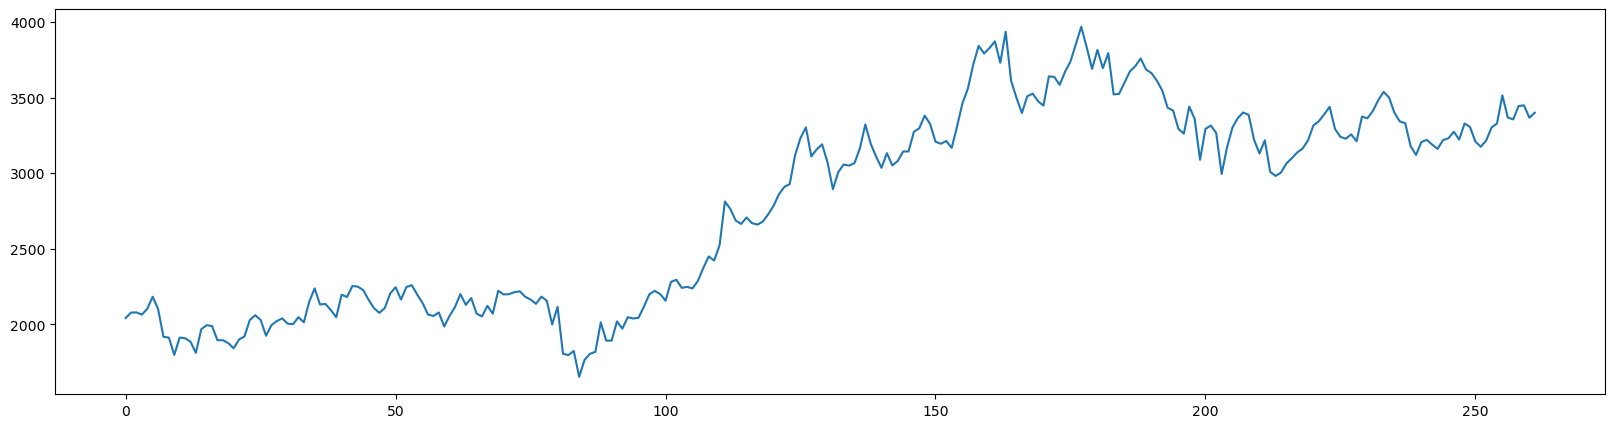

In [241]:
plt.figure(figsize=(20,5))
plt.plot(tcs_stock_data['Close'])
plt.show()

In [242]:
tcs_stock_data['date_time']= tcs_stock_data['Date'].apply(lambda x: pd.Series( str(x).split("00")[0]))

In [243]:
tcs_month = pd.Series(tcs_stock_data['date_time'].str.split(" ",expand=True)[1])

In [244]:
tcs_month

0      Aug
1      Aug
2      Sep
3      Sep
4      Sep
      ... 
257    Jul
258    Jul
259    Aug
260    Aug
261    Aug
Name: 1, Length: 262, dtype: object

In [245]:
month = tcs_stock_data['date_time'].str.split(" ",expand=True)

In [246]:
tcs_stock_data['date']=month[2]+'_'+month[1]+'_'++month[3]

In [247]:
tcs_stock_data.drop(columns=['date_time','Date','Forecast ‌Time Fcst‌ (14)'],axis=1,inplace=True)

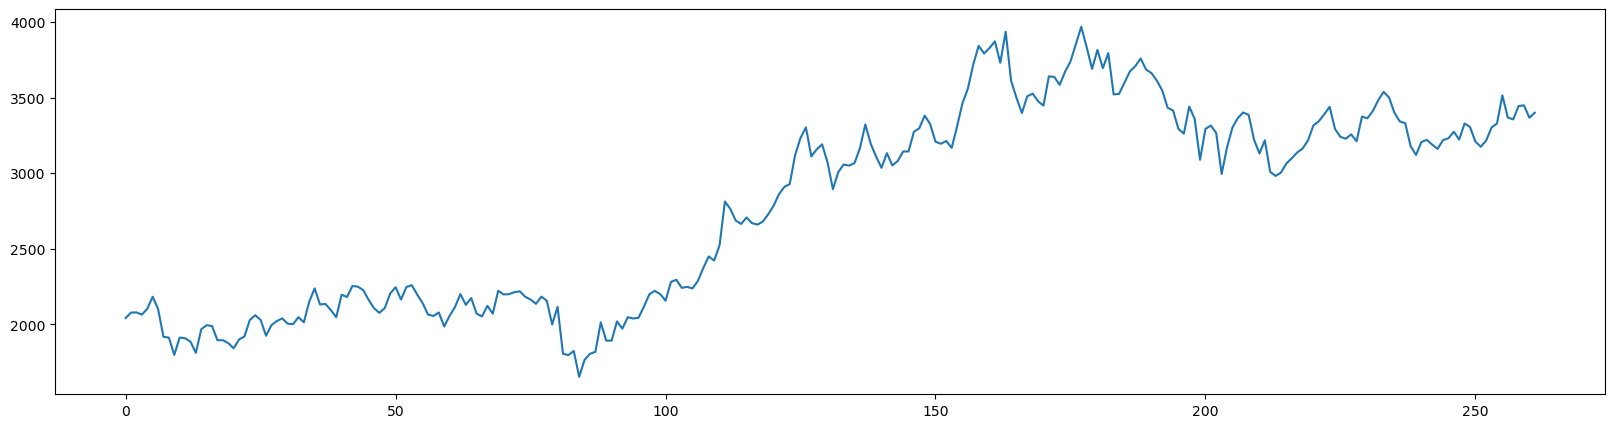

In [248]:
plt.figure(figsize=(20,5))
plt.plot(tcs_stock_data['Close'])

plt.show()

In [249]:
tcs_stock_data

,Open,High,Low,Close,date
0,2024.00,2046.00,2003.70,2043.00,20_Aug_2018
1,2043.00,2092.00,2035.00,2078.40,27_Aug_2018
2,2084.80,2107.25,2048.40,2079.85,03_Sep_2018
3,2084.40,2093.40,2018.15,2065.40,10_Sep_2018
4,2070.00,2121.00,2050.15,2103.15,17_Sep_2018
...,...,...,...,...,...
257,3381.00,3420.85,3331.00,3355.40,24_Jul_2023
258,3364.40,3471.00,3360.90,3443.55,31_Jul_2023
259,3453.95,3489.95,3414.00,3448.80,07_Aug_2023
260,3440.70,3466.00,3356.50,3367.10,14_Aug_2023


In [269]:
tcs_stock_data.set_index('date',inplace=True)

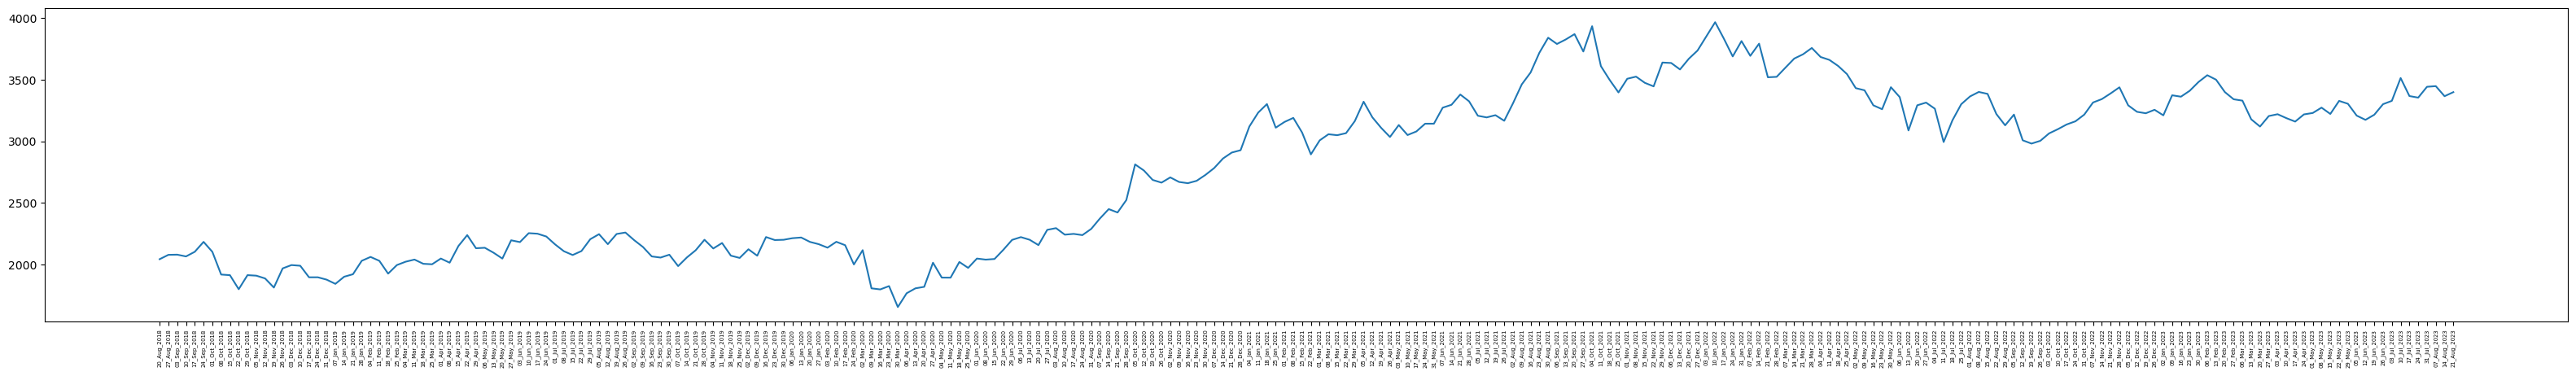

In [270]:
plt.figure(figsize=(40,5))
plt.plot(tcs['Close'])
plt.xticks(rotation=90,fontsize=5)
plt.show()

In [272]:
tcs_stock_data['log_trans'] = np.log(tcs_stock_data['Close'])

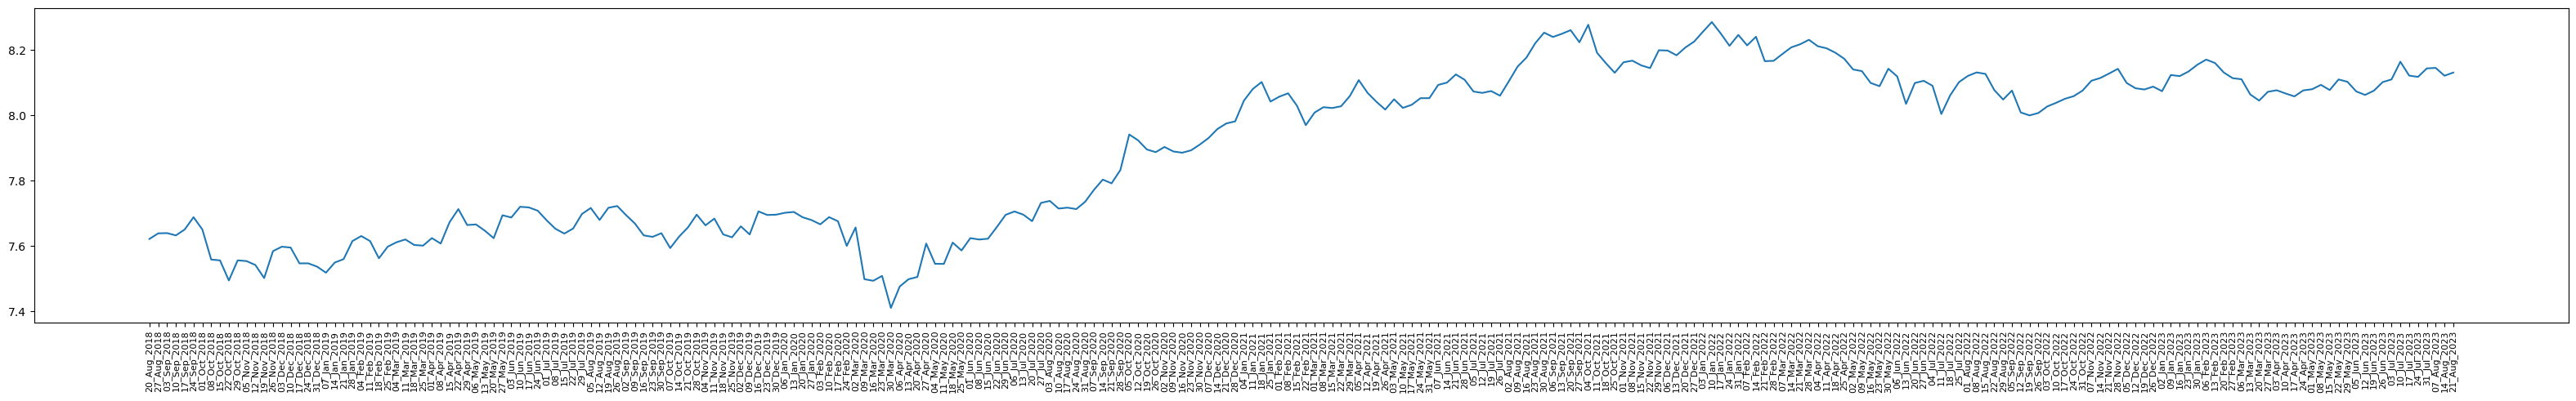

In [273]:
plt.figure(figsize=(40,5))
plt.plot(tcs_stock_data['log_trans'])
plt.xticks(rotation=90,fontsize=8)
plt.show()

In [274]:
tcs_stock_data['log_trans_shift'] = tcs_stock_data['log_trans'] - tcs_stock_data['log_trans'].shift(4)

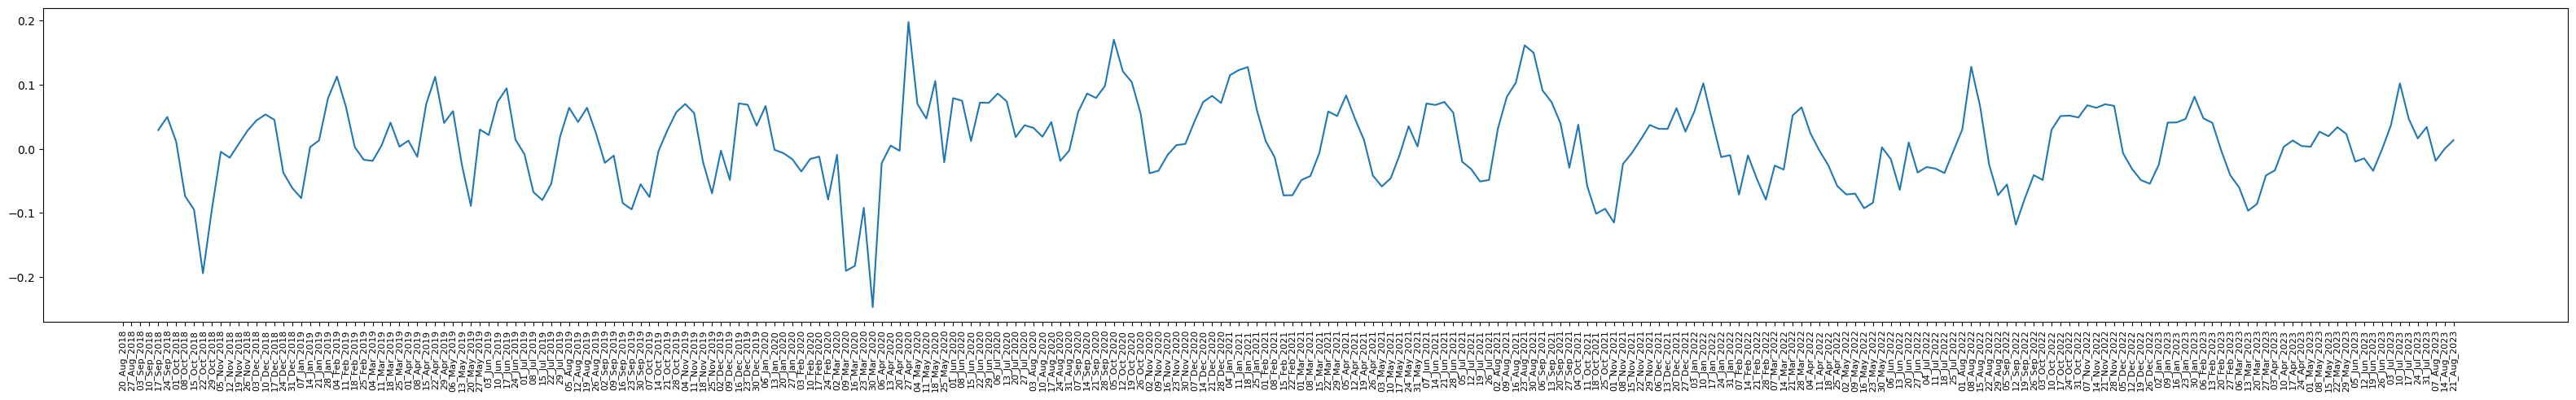

In [275]:
plt.figure(figsize=(40,5))
plt.plot(tcs_stock_data['log_trans_shift'])
plt.xticks(rotation=90,fontsize=8)
plt.show()

In [ ]:
movingAvg = timeseries.rolling(window=7).mean()
movingStd = timeseries.rolling(window=7).std()

In [276]:
tcs_stock_data['rolling_avg'] = tcs_stock_data['log_trans_shift'].rolling(window=4).mean()

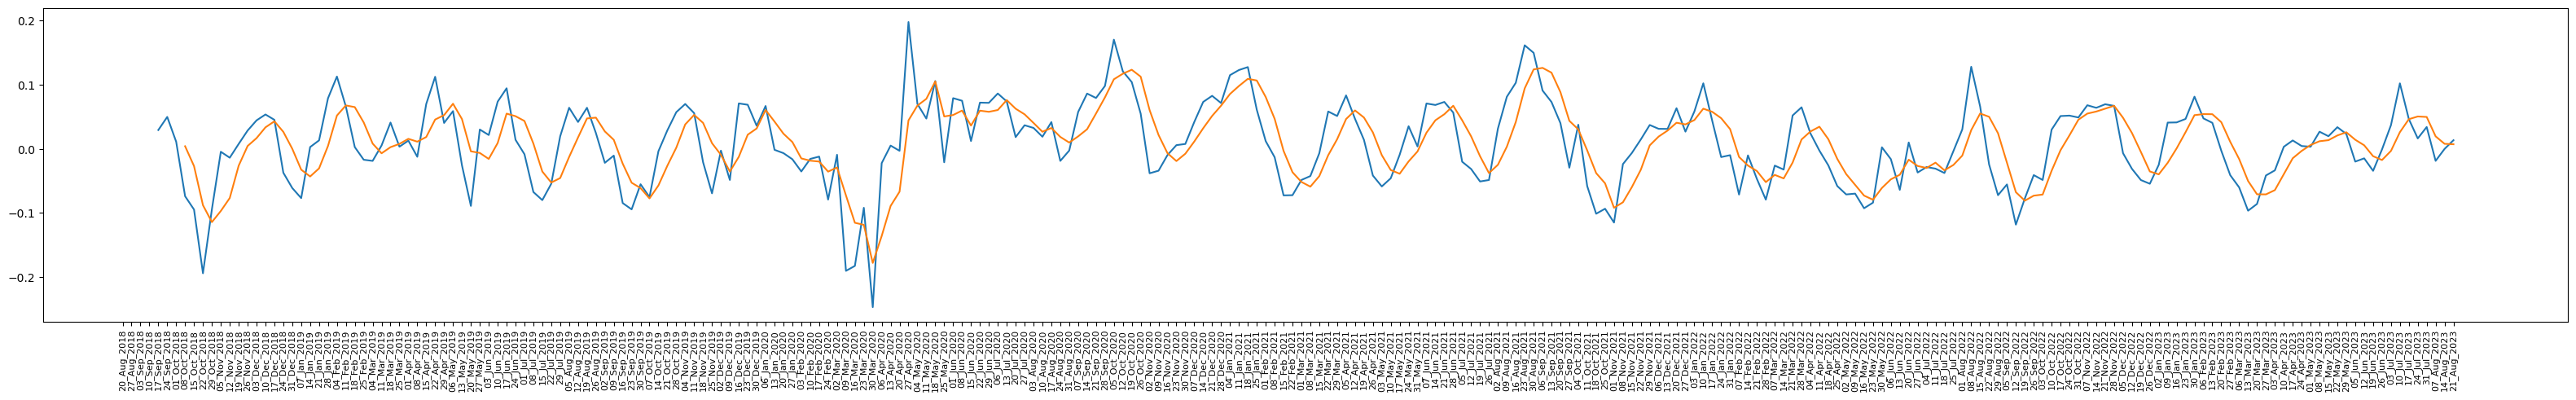

In [277]:
plt.figure(figsize=(40,5))
plt.plot(tcs_stock_data['log_trans_shift'])
plt.plot(tcs_stock_data['rolling_avg'])
plt.xticks(rotation=90,fontsize=8)
plt.show()

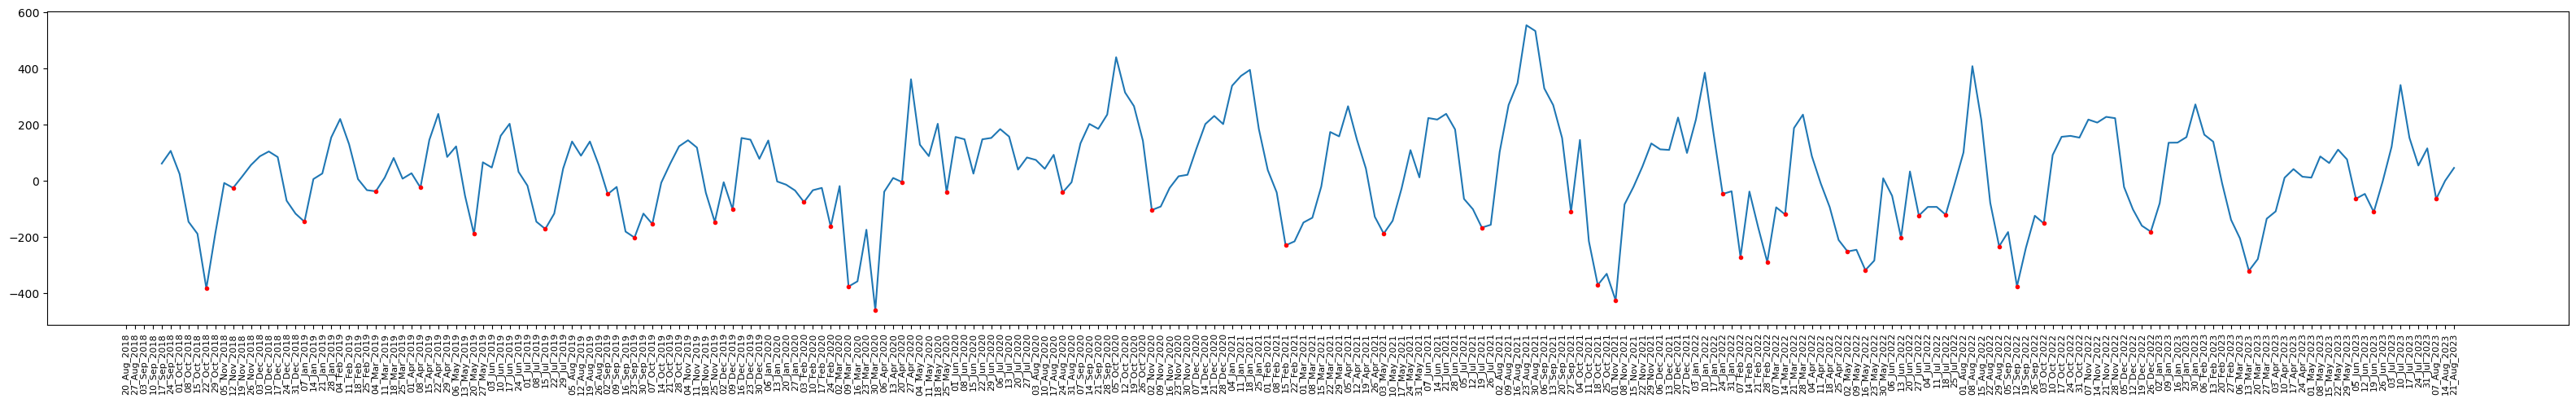

In [308]:
from scipy.signal import find_peaks

tcs_stock_data['Close_Shift_Month'] = tcs_stock_data['Close'] - tcs_stock_data['Close'].shift(4) 
tcs_stock_data['Close_Shift_Year'] = tcs_stock_data['Close'] - tcs_stock_data['Close'].shift(52) 

vally_idx,_ = find_peaks(-tcs_stock_data['Close_Shift_Month'],height=0)
plt.figure(figsize=(40,5))
# plt.plot(tcs_stock_data['Close'])
plt.plot(tcs_stock_data['Close_Shift_Month'])
# plt.plot(tcs_stock_data['Close_Shift_Year'])
plt.plot(tcs_stock_data['Close_Shift_Month'].iloc[vally_idx ], 'r.')
# plt.plot(tcs_stock_data['Close'].iloc[vally_idx ], 'b.')
# plt.plot(tcs_stock_data['Close'].iloc[vally_idx - 2], 'r.')
plt.xticks(rotation=90,fontsize=8)
plt.show()

In [306]:

tcs_stock_data[['Close']].iloc[vally_idx]

,Close
date,
22_Oct_2018,1799.10
12_Nov_2018,1886.60
07_Jan_2019,1842.55
04_Mar_2019,2022.70
08_Apr_2019,2014.50
20_May_2019,2048.00
15_Jul_2019,2076.95
02_Sep_2019,2197.50
23_Sep_2019,2056.15
